In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

## fetch APPEL stock share data from yahoo finance website

In [2]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2010-01-01', end = '2022-01-01')

## beginning Data

In [3]:
df.head()

High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2009-12-31  7.619643  7.520000  7.611786  7.526071  352410800.0   6.434927
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.535085
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.546384
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.442255
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.430345

## Ending Data 

In [4]:
df.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-12-27  180.419998  177.070007  177.089996  180.330002  74919600.0   
2021-12-28  181.330002  178.529999  180.160004  179.289993  79144300.0   
2021-12-29  180.630005  178.139999  179.330002  179.380005  62348900.0   
2021-12-30  180.570007  178.089996  179.470001  178.199997  59773000.0   
2021-12-31  179.229996  177.259995  178.089996  177.570007  64062300.0   

             Adj Close  
Date                    
2021-12-27  179.836319  
2021-12-28  178.799149  
2021-12-29  178.888916  
2021-12-30  177.712143  
2021-12-31  177.083878

In [5]:
#df=df.reset_index()

In [6]:
#df.head()

## Remove Data Column

In [7]:
df=df.drop(['Adj Close'],axis=1)

In [8]:
df.head()

High       Low      Open     Close       Volume
Date                                                           
2009-12-31  7.619643  7.520000  7.611786  7.526071  352410800.0
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0

## Show Graph of Specific column

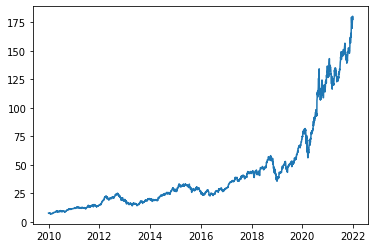

In [9]:
plt.plot(df.Close)

## Closing Columns first 100days avg

In [10]:
ma100= df.Close.rolling(100).mean()
ma100

Date
2009-12-31         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2021-12-27    153.3444
2021-12-28    153.6667
2021-12-29    153.9991
2021-12-30    154.3202
2021-12-31    154.6399
Name: Close, Length: 3022, dtype: float64

## Show Graph in Red 

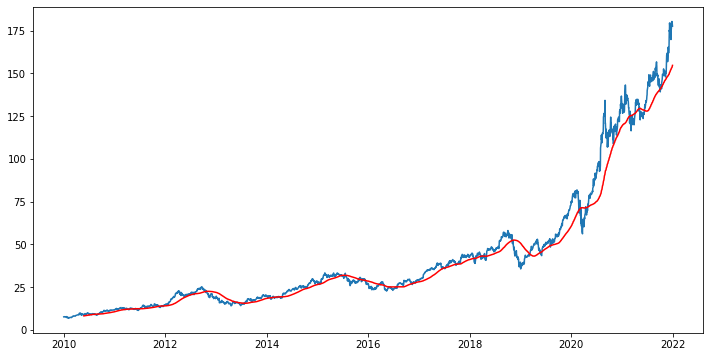

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

## Closing Columns first 200days avg

In [12]:
ma200=df.Close.rolling(200).mean()
ma200

Date
2009-12-31          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
                ...    
2021-12-27    142.85570
2021-12-28    143.13220
2021-12-29    143.40125
2021-12-30    143.66845
2021-12-31    143.95365
Name: Close, Length: 3022, dtype: float64

## Show Graph in green

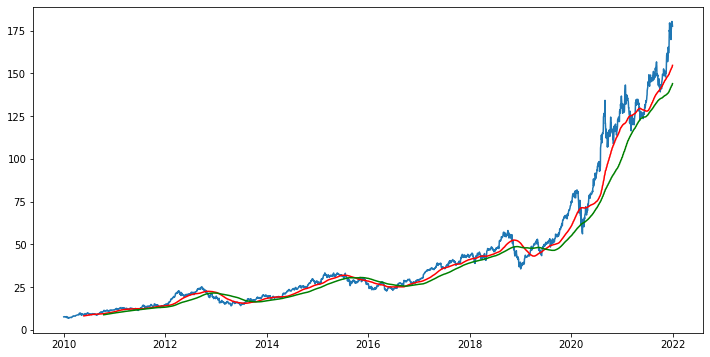

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

## If red cross the green and move UP then the prediction of graph will move UP.

## If red cross the green and move DOWN then the prediction of graph will move DOWN.

In [14]:
df.shape

(3022, 5)

## Split Data - Testing and Training 

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])

In [16]:
print(data_training.shape,data_testing.shape)

(2417, 1) (605, 1)


In [17]:
data_training.head()

Close
Date                
2009-12-31  7.526071
2010-01-04  7.643214
2010-01-05  7.656429
2010-01-06  7.534643
2010-01-07  7.520714

In [18]:
data_testing.head()

Close
Date                 
2019-08-09  50.247501
2019-08-12  50.119999
2019-08-13  52.242500
2019-08-14  50.687500
2019-08-15  50.435001

## Data Training 

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.82862106],
       [0.83859003],
       [0.86004294]])

In [21]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [22]:
x_train, y_train = np.array(x_train),np.array(y_train)

## ML Modeling [ LSTM ] 

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
#model = Sequential()
#model.add(LSTM(units=50, activation='relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
#model.add(Dropout(0.2))

#model.add(LSTM(units=60, activation='relu', return_sequences = True ))
#model.add(Dropout(0.2))

#model.add(LSTM(units=80, activation='relu', return_sequences = True ))
#model.add(Dropout(0.4))

#model.add(LSTM(units=120, activation='relu' ))
#model.add(Dropout(0.5))

#model.add(Dense(units = 1))

In [26]:
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(x_train, y_train, epochs=50)

Epoch 1/50
73/73 [==============================] - 23s 227ms/step - loss: 0.0370
Epoch 2/50
73/73 [==============================] - 16s 212ms/step - loss: 0.0068
Epoch 3/50
73/73 [==============================] - 16s 212ms/step - loss: 0.0067
Epoch 4/50
73/73 [==============================] - 15s 201ms/step - loss: 0.0056
Epoch 5/50
73/73 [==============================] - 15s 202ms/step - loss: 0.0057
Epoch 6/50
73/73 [==============================] - 15s 203ms/step - loss: 0.0046
Epoch 7/50
73/73 [==============================] - 15s 206ms/step - loss: 0.0049
Epoch 8/50
73/73 [==============================] - 16s 214ms/step - loss: 0.0049
Epoch 9/50
73/73 [==============================] - 14s 195ms/step - loss: 0.0043
Epoch 10/50
73/73 [==============================] - 16s 215ms/step - loss: 0.0040
Epoch 11/50
73/73 [==============================] - 15s 204ms/step - loss: 0.0038
Epoch 12/50
73/73 [==============================] - 15s 207ms/step - loss: 0.0036
Epoch 13/50
7

In [28]:
#model.save('my_keras_model.h5')

In [29]:
data_testing.head()

Close
Date                 
2019-08-09  50.247501
2019-08-12  50.119999
2019-08-13  52.242500
2019-08-14  50.687500
2019-08-15  50.435001

In [30]:
 data_training.tail(100)

Close
Date                 
2019-03-19  46.632500
2019-03-20  47.040001
2019-03-21  48.772499
2019-03-22  47.762501
2019-03-25  47.185001
...               ...
2019-08-02  51.005001
2019-08-05  48.334999
2019-08-06  49.250000
2019-08-07  49.759998
2019-08-08  50.857498

[100 rows x 1 columns]

In [31]:
past_100_days = data_training.tail(100)

In [66]:
final_df = past_100_days.append( data_testing, ignore_index=True)

In [67]:
final_df.head()

Close
0  50.247501
1  50.119999
2  52.242500
3  50.687500
4  50.435001

In [68]:
input_data = scaler.fit_transform(final_df)

In [69]:
input_data

array([[0.05052736],
       [0.04959672],
       [0.06508886],
       [0.05373891],
       [0.05189592],
       [0.06058172],
       [0.06760703],
       [0.06762526],
       [0.07178569],
       [0.07145725],
       [0.05353818],
       [0.06056349],
       [0.05631181],
       [0.05881171],
       [0.06516184],
       [0.06466918],
       [0.05912192],
       [0.06549031],
       [0.07295353],
       [0.07291703],
       [0.07457756],
       [0.07919418],
       [0.09176671],
       [0.09085434],
       [0.08293492],
       [0.08503338],
       [0.08649318],
       [0.09027043],
       [0.08696763],
       [0.08107367],
       [0.08288018],
       [0.08098243],
       [0.08709535],
       [0.08501514],
       [0.08306267],
       [0.09246013],
       [0.09359146],
       [0.08331813],
       [0.08671217],
       [0.09800736],
       [0.0980986 ],
       [0.09324475],
       [0.09804386],
       [0.10362759],
       [0.11479509],
       [0.11417465],
       [0.11317106],
       [0.111

In [70]:
input_data.shape

(705, 1)

In [71]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [72]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [73]:
print(x_test.shape,y_test.shape)

(605, 100, 1) (605,)


## Prediction  

In [74]:
y_predicted = model.predict(x_test)

19/19 [==============================] - 2s 68ms/step


In [76]:
y_predicted.shape

(605, 1)

In [77]:
y_test

array([0.23183461, 0.22650631, 0.23083096, 0.22825811, 0.23701689,
       0.24876829, 0.25004559, 0.26214369, 0.25433376, 0.2518886 ,
       0.25900512, 0.26537354, 0.26143207, 0.26349405, 0.26628591,
       0.26460712, 0.24752748, 0.26347578, 0.27561036, 0.27475273,
       0.24854933, 0.24699828, 0.2655925 , 0.27033686, 0.27719789,
       0.26774569, 0.27051929, 0.26697927, 0.28082918, 0.27657748,
       0.27672349, 0.2658662 , 0.27429654, 0.26823836, 0.25500891,
       0.22787487, 0.20944488, 0.217784  , 0.18287651, 0.18258454,
       0.22902448, 0.21170761, 0.23619573, 0.21827672, 0.21117841,
       0.16946464, 0.20444508, 0.18636179, 0.13672857, 0.19099667,
       0.12574359, 0.14517718, 0.13388197, 0.13043319, 0.10207657,
       0.09319001, 0.13426518, 0.13178351, 0.15535929, 0.13583446,
       0.14873544, 0.14778656, 0.12337141, 0.13070689, 0.12428379,
       0.16271304, 0.15716578, 0.16928215, 0.17278564, 0.18238385,
       0.20756539, 0.20278455, 0.2069085 , 0.1998102 , 0.18909

In [79]:
y_predicted

array([[0.23614417],
       [0.2391426 ],
       [0.24238615],
       [0.2458551 ],
       [0.24945477],
       [0.25313824],
       [0.2569431 ],
       [0.2608912 ],
       [0.26506096],
       [0.26939586],
       [0.27372015],
       [0.27790418],
       [0.28188673],
       [0.28556293],
       [0.2888327 ],
       [0.2916825 ],
       [0.29409754],
       [0.29590964],
       [0.29713613],
       [0.29799145],
       [0.2986905 ],
       [0.2991351 ],
       [0.29915774],
       [0.2988451 ],
       [0.29840153],
       [0.2980998 ],
       [0.29804498],
       [0.29826257],
       [0.29866803],
       [0.29929048],
       [0.30012167],
       [0.3011105 ],
       [0.30208105],
       [0.30294636],
       [0.30360895],
       [0.30388564],
       [0.3034391 ],
       [0.30184683],
       [0.2988842 ],
       [0.29438224],
       [0.28842396],
       [0.28175545],
       [0.27502757],
       [0.2690288 ],
       [0.26410902],
       [0.2602715 ],
       [0.25702482],
       [0.254

In [81]:
scaler.scale_

array([0.007299])

In [82]:
scale_factor=1/0.007299

In [83]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [84]:
y_test

array([ 31.76251656,  31.03251284,  31.62501191,  31.27251845,
        32.47251599,  34.0825174 ,  34.25751291,  35.91501496,
        34.84501473,  34.51001548,  35.48501444,  36.35752006,
        35.81751888,  36.10002024,  36.48252012,  36.25251665,
        33.91251915,  36.0975178 ,  37.7600171 ,  37.64251673,
        34.05251861,  33.84001698,  36.38751885,  37.0375207 ,
        37.97751598,  36.68251717,  37.06251461,  36.57751376,
        38.47502142,  37.89251686,  37.91252114,  36.42501735,
        37.5800167 ,  36.75001446,  34.93751356,  31.22001293,
        28.69501015,  29.83751255,  25.05500895,  25.01500801,
        31.37751423,  29.00501549,  32.36001289,  29.90501746,
        28.93251332,  23.21751414,  28.01001225,  25.5325101 ,
        18.73250748,  26.16751255,  17.22750948,  19.89000928,
        18.3425079 ,  17.87000782,  13.98500756,  12.76750436,
        18.3950096 ,  18.05500928,  21.28501043,  18.61000986,
        20.37750876,  20.24750763,  16.90250856,  17.90

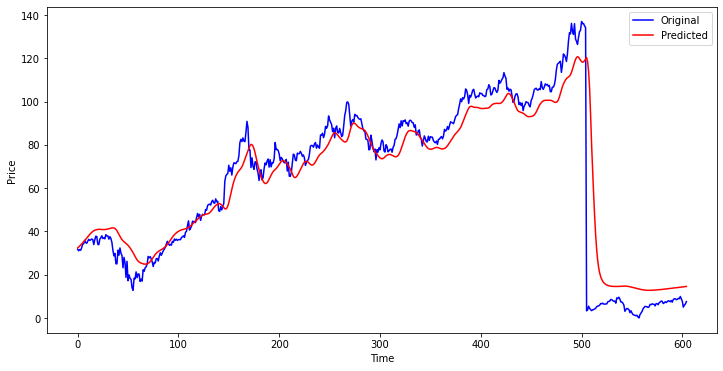

In [85]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original')
plt.plot(y_predicted,'r', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()